In [5]:
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as scs
import numpy as np
import pandas as pd

In [6]:
mc = pymongo.MongoClient() 

db = mc['movies_metadata']

In [7]:
mc = pymongo.MongoClient() 

db = mc['movies_metadata']

In [8]:
db.collection_names()

['test', 'movies', 'movies_backup', 'movies_clean_v2', 'movies_clean']

In [9]:
test = db['test']  # Use (or create) a collection called 'test'
movies = db['movies'] #Create a collection called movies
movies_clean_v2 = db['movies_clean_v2']

In [10]:
len(list(movies_clean_v2.find()))

1583

In [11]:
df_clean = pd.DataFrame(list(movies_clean_v2.find()))
df_clean.head()

,_id,data,title
0,5afb21667cfdd32058932636,"{'': '', 'Domestic Box Office': '620181382', '...",Star Wars Ep. VIII: The Last Jedi (2017)
1,5afb21677cfdd32058932637,"{'': '', 'Domestic Box Office': '504014165', '...",Beauty and the Beast (2017)
2,5afb21677cfdd32058932638,"{'': '', 'Domestic Box Office': '225764765', '...",The Fate of the Furious (2017)
3,5afb21677cfdd32058932639,"{'': '', 'Domestic Box Office': '264624300', '...",Despicable Me 3 (2017)
4,5afb21687cfdd3205893263a,"{'': '', 'Domestic Box Office': '404353892', '...",Jumanji: Welcome to the Jungle (2017)


In [12]:
df_clean_data = pd.DataFrame(list(df_clean['data']))
df_clean_data.head()

,,1st Assistant Director,3-D and Digital Image Producer,3D Animator,3D Stereoscopic Supervisor,ADR Editor,ADR Mixer,ADR Recording Engineer,ADR/Dialogue Editor,Action Choreographer,...,Visual Effects Supervisor: MPC,Visual Effects Supervisor: Milk Visual Effects,Visual Effects by,Wardrobe Supervisor,Worldwide Box Office,Written By,Written by,based on the novel “A Monster Calls” by,lead_cast,story based on a novel by
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1320214241,NaN,NaN,NaN,"[Mark Hamill, Carrie Fisher, Adam Driver, Dais...",NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1263109573,NaN,NaN,NaN,"[Emma Watson, Dan Stevens, Luke Evans, Kevin K...",NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1237466026,NaN,NaN,NaN,"[Vin Diesel, Dwayne Johnson, Jason Statham, Mi...",NaN
3,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1034542646,NaN,NaN,NaN,"[Steve Carell, Kristen Wiig, Trey Parker]",NaN
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,958513171,NaN,NaN,NaN,"[Dwayne Johnson, Jack Black, Kevin Hart, Karen...",NaN


In [13]:
runtime_test = df_clean_data['Running Time']
runtime_test = runtime_test.fillna(0)
runtime_test = runtime_test.apply(lambda x: str(x))
runtime_test = runtime_test.apply(lambda x: x.split()[0])
runtime_test = runtime_test.apply(int)

In [14]:
runtime_test == 95.0

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1553    False
1554    False
1555    False
1556    False
1557    False
1558    False
1559    False
1560     True
1561    False
1562    False
1563    False
1564    False
1565    False
1566    False
1567     True
1568    False
1569    False
1570    False
1571    False
1572    False
1573    False
1574     True
1575    False
1576    False
1577    False
1578    False
1579    False
1580    False
1581    False
1582    False
Name: Running Time, Length: 1583, dtype: bool

In [15]:
runtime_test.mean()

91.29185091598231

In [16]:
df_clean_data['Running Time'].isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1553    False
1554    False
1555    False
1556    False
1557     True
1558    False
1559    False
1560    False
1561    False
1562    False
1563    False
1564    False
1565    False
1566    False
1567    False
1568     True
1569    False
1570    False
1571     True
1572     True
1573    False
1574    False
1575     True
1576     True
1577    False
1578    False
1579    False
1580    False
1581    False
1582    False
Name: Running Time, Length: 1583, dtype: bool

In [17]:
def create_ww(dataframe):
    dom = dataframe['Domestic Box Office'].fillna(0, inplace=False)
    intl = dataframe['International Box Office'].fillna(0, inplace=False)
    #nulls will be replaced with $25 mil for now, but might change depending on model results.
    budget_isna = dataframe['Production Budget'].isna()
    budget = dataframe['Production Budget'].fillna(25000000, inplace=False)
    
    runtime_isna = dataframe['Running Time'].isna()
    
    df = pd.DataFrame()
    
    dom_numeric = dom.apply(pd.to_numeric)
    intl_numeric = intl.apply(pd.to_numeric)
    
    df['ww_agg'] = dom_numeric + intl_numeric
    df['production_budget'] = budget.apply(pd.to_numeric)

    
    df['log_ww_agg'] = df['ww_agg'].apply(np.log)
    df['log_budget'] = df['production_budget'].apply(np.log)
    
    df['budget_isna'] = budget_isna
    df['runtime_isna'] = runtime_isna

    return df

In [18]:
def build_clean_dataset(dataframe):
    df = create_ww(dataframe)
    df['ratings'] = parse_mpaa_col(dataframe)
    df['runtime'] = parse_runtime_col(dataframe)
    df['is_franchise'] = create_franchise_dummy(dataframe)
    df['genre'] = parse_genre(dataframe)
    df['prod_method'] = parse_prod_method(dataframe)
    df['creative'] = parse_creative(dataframe)
    df['source'] = parse_source(dataframe)
    df['month'], df['day'], df['year'] = parse_release_date(dataframe)
    return df

def parse_mpaa_col(dataframe):
    ratings = dataframe.loc[:,'MPAA Rating']
    ratings = ratings.apply(lambda a: str(a))
    ratings = ratings.apply(lambda b: b.split()[0])
    ratings = ratings.apply(strip_text)
    return ratings

def strip_text(bad_text):
    if bad_text.endswith('(Rating'):
        bad_text = bad_text.replace('(Rating', '')
    return bad_text

def parse_runtime_col(dataframe):
    runtime = dataframe['Running Time']
    runtime = runtime.fillna(95.1) #<- This was the median of the non-null runtimes
    runtime = runtime.apply(lambda x: str(x))
    runtime = runtime.apply(lambda x: x.split()[0])
    runtime = runtime.apply(float)
    return runtime

def create_franchise_dummy(dataframe):
    franchise = dataframe['Franchise'].isna() ^ 1
    return franchise

def parse_genre(dataframe):
    genre = dataframe['Genre']
    return genre

def parse_prod_method(dataframe):
    prod_method = dataframe['Production Method']
    return prod_method

def parse_creative(dataframe):
    creative = dataframe['Creative Type']
    return creative

def parse_source(dataframe):
    source = dataframe['Source']
    return source

def parse_release_date(dataframe):
    months = []
    days = []
    years = []
    for date in dataframe['Domestic Releases']:
        if date == date: #checking if null. if true then not null
            month = list(date.split(' '))[0]
            day = list(date.split(' '))[1]
            year = list(date.split(' '))[2]
        else:
            month = None
            day = None
            year = None
        months.append(month)
        days.append(day)
        years.append(year)
    return months, days, years

def parse_directors(dataframe):
    
    director = []
    for i in range(len(dataframe['Director'])):
        if type(dataframe['Director'][i]) == list:
            director.append(dataframe['Director'][i][1])
        else:
            director.append(dataframe['Director'][i])
    return pd.Series(director)


In [19]:
df_clean_data['Running Time']

0       150 minutes
1       123 minutes
2       136 minutes
3        90 minutes
4       119 minutes
5       133 minutes
6       136 minutes
7       130 minutes
8       141 minutes
9       105 minutes
10      135 minutes
11      135 minutes
12      121 minutes
13      135 minutes
14      148 minutes
15      118 minutes
16       97 minutes
17      107 minutes
18      142 minutes
19      105 minutes
20      107 minutes
21      141 minutes
22      109 minutes
23      118 minutes
24      114 minutes
25      110 minutes
26      106 minutes
27      109 minutes
28      113 minutes
29      107 minutes
           ...     
1553     90 minutes
1554     84 minutes
1555     75 minutes
1556     92 minutes
1557            NaN
1558     94 minutes
1559     86 minutes
1560     95 minutes
1561     94 minutes
1562     93 minutes
1563     74 minutes
1564     75 minutes
1565    110 minutes
1566     82 minutes
1567     95 minutes
1568            NaN
1569     88 minutes
1570     96 minutes
1571            NaN


In [20]:
df_ready_for_model = build_clean_dataset(df_clean_data)

In [21]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,budget_isna,runtime_isna,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,True,False,PG-13,150.0,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,False,False,PG,123.0,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,False,False,PG-13,136.0,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,False,False,PG,90.0,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,False,False,PG-13,119.0,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017


In [22]:
df_dummies_ratings = pd.get_dummies(df_ready_for_model.ratings)

df_dummies_genre = pd.get_dummies(df_ready_for_model.genre)

df_dummies_prod_method = pd.get_dummies(df_ready_for_model.prod_method)

df_dummies_creative = pd.get_dummies(df_ready_for_model.creative)

df_dummies_source = pd.get_dummies(df_ready_for_model.source)

df_dummies_month = pd.get_dummies(df_ready_for_model.month)

df_with_dummies = df_ready_for_model[['log_ww_agg', 'log_budget', 'budget_isna','runtime', 'runtime_isna', 'is_franchise']]

df_with_all_dummies = pd.concat([df_with_dummies, df_dummies_ratings, df_dummies_genre, df_dummies_prod_method, df_dummies_creative,
          df_dummies_source, df_dummies_month], axis =1)

df_with_all_dummies

,log_ww_agg,log_budget,budget_isna,runtime,runtime_isna,is_franchise,G,Not,PG,PG-13,...,Fall,February,January,July,June,March,May,November,October,September
0,21.001060,17.034386,True,150.0,False,True,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,20.956842,18.890684,False,123.0,False,False,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,20.936332,19.336971,False,136.0,False,True,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,20.757225,18.132999,False,90.0,False,True,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,20.680894,18.315320,False,119.0,False,True,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,20.595672,18.980297,False,133.0,False,True,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,20.576154,19.113828,False,136.0,False,True,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,20.561515,19.008467,False,130.0,False,True,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,20.521165,18.826146,False,141.0,False,True,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,20.500620,18.980297,False,105.0,False,False,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [89]:
df_no_runtime = df_with_all_dummies[df_with_all_dummies.columns.difference(['runtime', 'runtime_isna'])]

In [95]:
df_no_runtime.iloc[:,:-2]

,Action,Adventure,Animation/Live Action,April,August,Based on Comic/Graphic Novel,Based on Factual Book/Article,Based on Fiction Book/Short Story,Based on Folk Tale/Legend/Fairytale,Based on Game,...,Science Fiction,September,Spin-Off,Stop-Motion Animation,Super Hero,Thriller/Suspense,Western,budget_isna,is_franchise,log_budget
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,True,True,17.034386
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,False,18.890684
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,True,19.336971
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,True,18.132999
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,True,18.315320
5,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,False,True,18.980297
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,False,True,19.113828
7,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,False,True,19.008467
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,False,True,18.826146
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,False,False,18.980297


In [119]:
X_train, X_test, y_train, y_test = train_test_split(df_with_all_dummies.iloc[:,1:], df_with_all_dummies.iloc[:,0])

In [120]:
lr = LinearRegression()

In [121]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
y_pred = lr.predict(X_test)

In [123]:
mean_squared_error(y_test, y_pred)

5.09435315918304

In [124]:
y_train_pred = lr.predict(X_train)

In [125]:
mean_squared_error(y_train, y_train_pred)

4.4383326224688444

In [158]:
regr = RandomForestRegressor(n_estimators = 5000)

In [159]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [160]:
y_test_pred = regr.predict(X_test)

In [161]:
mean_squared_error(y_test, y_test_pred)

5.6098749660039555

In [162]:
y_train_pred = regr.predict(X_train)

In [163]:
mean_squared_error(y_train, y_train_pred)

0.86802965669624566

In [133]:
gboost = GradientBoostingRegressor()

In [140]:
gboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [141]:
y_pred = gboost.predict(X_test)

In [142]:
mean_squared_error(y_test, y_pred)

4.9456644481325505

In [144]:
y_train_pred = gboost.predict(X_train)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df_no_runtime.iloc[:,:-2], df_no_runtime.iloc[:,-2])

In [97]:
regr = RandomForestRegressor(n_estimators = 5000, max_depth = 3, random_state = 0)

In [98]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
y_test_pred = regr.predict(X_test)

In [100]:
mean_squared_error(y_test, y_test_pred)

5.56450972643478

In [101]:
y_train_pred = regr.predict(X_train)

In [102]:
mean_squared_error(y_train, y_train_pred)

5.3007044968654027

In [103]:
gboost = GradientBoostingRegressor(n_estimators = 1000)

In [104]:
gboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [105]:
y_pred = gboost.predict(X_test)

In [106]:
y_train_pred = gboost.predict(X_train)

In [107]:
mean_squared_error(y_train, y_train_pred)

2.5393882935804162

In [108]:
mean_squared_error(y_test, y_pred)

5.0961047287400323

In [109]:
df_with_all_dummies.columns

Index(['log_ww_agg', 'log_budget', 'budget_isna', 'runtime', 'runtime_isna',
       'is_franchise', 'G', 'Not', 'PG', 'PG-13', 'R', 'nan', 'Action',
       'Adventure', 'Black Comedy', 'Comedy', 'Concert/Performance',
       'Documentary', 'Drama', 'Horror', 'Multiple Genres', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western',
       'Animation/Live Action', 'Digital Animation', 'Hand Animation',
       'Live Action', 'Multiple Production Methods', 'Stop-Motion Animation',
       'Contemporary Fiction', 'Dramatization', 'Factual', 'Fantasy',
       'Historical Fiction', 'Kids Fiction', 'Multiple Creative Types',
       'Science Fiction', 'Super Hero', 'Based on Comic/Graphic Novel',
       'Based on Factual Book/Article', 'Based on Fiction Book/Short Story',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Game',
       'Based on Movie', 'Based on Musical Group', 'Based on Musical or Opera',
       'Based on Play', 'Based on Real Life Events', 'Based on Religio

In [166]:
'hi' in 'hi'

True

0                                            Rian Johnson
1                                             Bill Condon
2                                            F. Gary Gray
3                             [Pierre Coffin, Kyle Balda]
4                                             Jake Kasdan
5                                               Jon Watts
6                                              James Gunn
7                                           Taika Waititi
8                                           Patty Jenkins
9                                             Lee Unkrich
10                       [Joachim Ronnin, Espen Sandberg]
11                                       Andy Muschietti*
12                                            Zack Snyder
13                                          James Mangold
14                                            Michael Bay
15                                    Jordan Vogt-Roberts
16                                            Tom McGrath
17            

In [168]:
rf = RandomForestRegressor()

In [169]:
parameters = { 'n_estimators': [100],'max_depth':list(range(5,71,10)), 'max_features': list(range(5,71,10))}

In [171]:
clf = GridSearchCV(rf, parameters)

In [173]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_depth': [5, 15, 25, 35, 45, 55, 65], 'max_features': [5, 15, 25, 35, 45, 55, 65]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [174]:
clf.best_params_

{'max_depth': 15, 'max_features': 15, 'n_estimators': 100}

In [178]:
rf_best_params = RandomForestRegressor(max_depth= 15, max_features= 15, n_estimators= 100)

In [179]:
rf_best_params.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [180]:
y_pred = rf_best_params.predict(X_test)

In [181]:
mean_squared_error(y_test, y_pred)

5.0185625820274149

In [182]:
y_train_pred = rf_best_params.predict(X_train)

In [183]:
mean_squared_error(y_train_pred, y_train)

1.5699932025818835

In [184]:
rf_best_params = RandomForestRegressor(max_depth= 15, max_features= 15, n_estimators= 4000)

In [185]:
rf_best_params.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=4000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [186]:
y_pred = rf_best_params.predict(X_test)

In [187]:
mean_squared_error(y_test, y_pred)

4.9629209993517609

In [188]:
y_train_pred = rf_best_params.predict(X_train)

In [189]:
mean_squared_error(y_train_pred, y_train)

1.5365184852626557

In [196]:
#Try to count num of actors and directors and pick the top 25 most common
df_clean_data['Director'][1572]

nan

In [209]:
director_lst = []
for director in df_clean_data['Director']:
    if type(director) == list:
        director_lst.extend(director)
    elif type(director) == str:
        director_lst.append(director)

In [210]:
director_lst

['Rian Johnson',
 'Bill Condon',
 'F. Gary Gray',
 'Pierre Coffin',
 'Kyle Balda',
 'Jake Kasdan',
 'Jon Watts',
 'James Gunn',
 'Taika Waititi',
 'Patty Jenkins',
 'Lee Unkrich',
 'Joachim Ronnin',
 'Espen Sandberg',
 'Andy Muschietti*',
 'Zack Snyder',
 'James Mangold',
 'Michael Bay',
 'Jordan Vogt-Roberts',
 'Tom McGrath',
 'Christopher Nolan',
 'Matt Reeves',
 'Michael Gracey',
 'Alex Kurtzman',
 'Matthew Vaughn',
 'Brian Fee',
 'James Foley',
 'Kenneth Branagh',
 'D.J. Caruso',
 'Chris McKay',
 'David F. Sandberg',
 'Stephen Chbosky',
 'Carlos Saldanha',
 'M. Night Shyamalan',
 'Denis Villeneuve',
 'Jordan Peele',
 'Ridley Scott',
 'Edgar Wright',
 'Dean Devlin',
 'Tony Leondis*',
 'Lasse Hallström',
 'Kelly Asbury',
 'Guillermo del Toro',
 'Trish Sie',
 'Seth Gordon',
 'Sean Anders',
 'Steven Spielberg',
 'Patrick Hughes',
 'Chad Stahelski',
 'Rupert Sanders',
 'Martin McDonagh',
 'Dean Israelite',
 'Malcolm D. Lee',
 'Guy Ritchie',
 'Doug Liman',
 'Jon Lucas',
 'Scott Moore',
 

In [200]:
import collections

In [211]:
counter_directors = collections.Counter(director_lst)

In [212]:
print(counter_directors.most_common(25))

[('Alex Gibney', 4), ('Jon Watts', 3), ('Denis Villeneuve', 3), ('Ridley Scott', 3), ('Steven Spielberg', 3), ('James Franco', 3), ('Woody Allen', 3), ('David Gordon Green', 3), ('Terrence Malick', 3), ('Ron Howard', 3), ('Noah Baumbach', 3), ('Amy Berg', 3), ('Bill Condon', 2), ('F. Gary Gray', 2), ('Pierre Coffin', 2), ('Kyle Balda', 2), ('Zack Snyder', 2), ('Michael Bay', 2), ('Christopher Nolan', 2), ('Matthew Vaughn', 2), ('Kenneth Branagh', 2), ('D.J. Caruso', 2), ('David F. Sandberg', 2), ('M. Night Shyamalan', 2), ('Guillermo del Toro', 2)]


In [216]:
actor_lst = []
for actor in df_clean_data['lead_cast']:
    if type(actor) == list:
        actor_lst.extend(actor)
    elif type(actor) == str:
        actor_lst.append(actor)

In [217]:
counter_actors = collections.Counter(actor_lst)

In [218]:
print(counter_actors.most_common(25))

[('James Franco', 11), ('Idris Elba', 9), ('Kristen Wiig', 8), ('Kevin Hart', 8), ('Samuel L. Jackson', 8), ('Woody Harrelson', 8), ('Julianne Moore', 8), ('Anna Kendrick', 8), ('Josh Gad', 7), ('Mark Wahlberg', 7), ('Owen Wilson', 7), ('Michael Fassbender', 7), ('Ryan Reynolds', 7), ('Scarlett Johansson', 7), ('Jake Gyllenhaal', 7), ('Morgan Freeman', 7), ('Nicolas Cage', 7), ('Adam Driver', 6), ('Dwayne Johnson', 6), ('Charlize Theron', 6), ('Chris Hemsworth', 6), ('Zac Efron', 6), ('Tom Hanks', 6), ('Susan Sarandon', 6), ('Michael Peña', 6)]


In [230]:
pd.DataFrame(counter_directors.most_common(25)).iloc[:,0]

0            Alex Gibney
1              Jon Watts
2       Denis Villeneuve
3           Ridley Scott
4       Steven Spielberg
5           James Franco
6            Woody Allen
7     David Gordon Green
8        Terrence Malick
9             Ron Howard
10         Noah Baumbach
11              Amy Berg
12           Bill Condon
13          F. Gary Gray
14         Pierre Coffin
15            Kyle Balda
16           Zack Snyder
17           Michael Bay
18     Christopher Nolan
19        Matthew Vaughn
20       Kenneth Branagh
21           D.J. Caruso
22     David F. Sandberg
23    M. Night Shyamalan
24    Guillermo del Toro
Name: 0, dtype: object

In [ ]:
pd.to

Text(0.5,1,'Revenue')

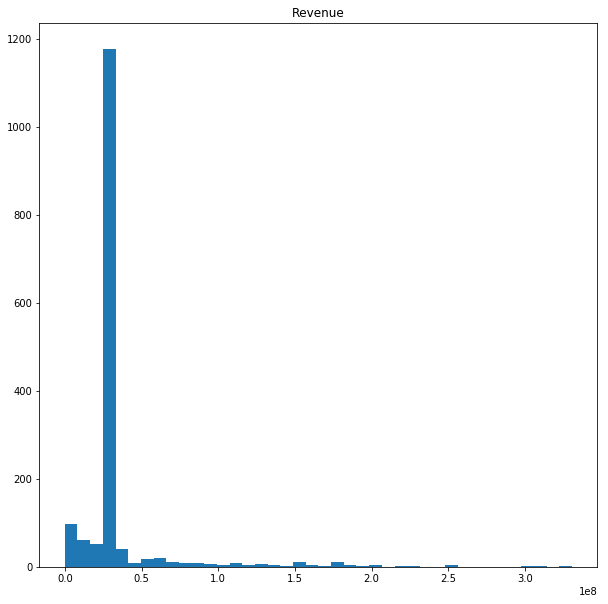

In [236]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_clean_data['Production Budget'].fillna(25000000, inplace = False).apply(pd.to_numeric), bins = 40)
ax.set_title('Revenue')

Text(0.5,1,'Frequencies of log(revenue)')

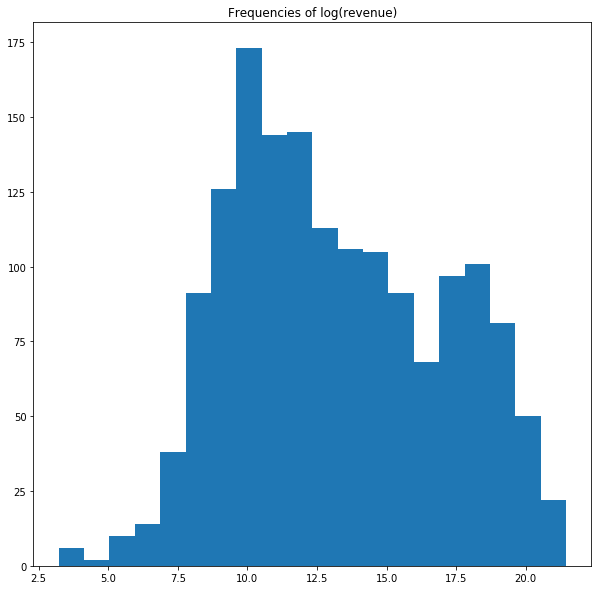

In [237]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_ready_for_model['log_ww_agg'], bins = 20)
ax.set_title('Frequencies of log(revenue)')

In [4]:
df_with_all_dummies.head()

NameError: name 'df_with_all_dummies' is not defined

In [25]:
from pandas.plotting import scatter_matrix

In [24]:
df_for_scatter = df_with_all_dummies.loc[:,['log_ww_agg', 'log_budget', 'runtime', 'is_franchise' ]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5da3310470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5da27fcac8>]], dtype=object)

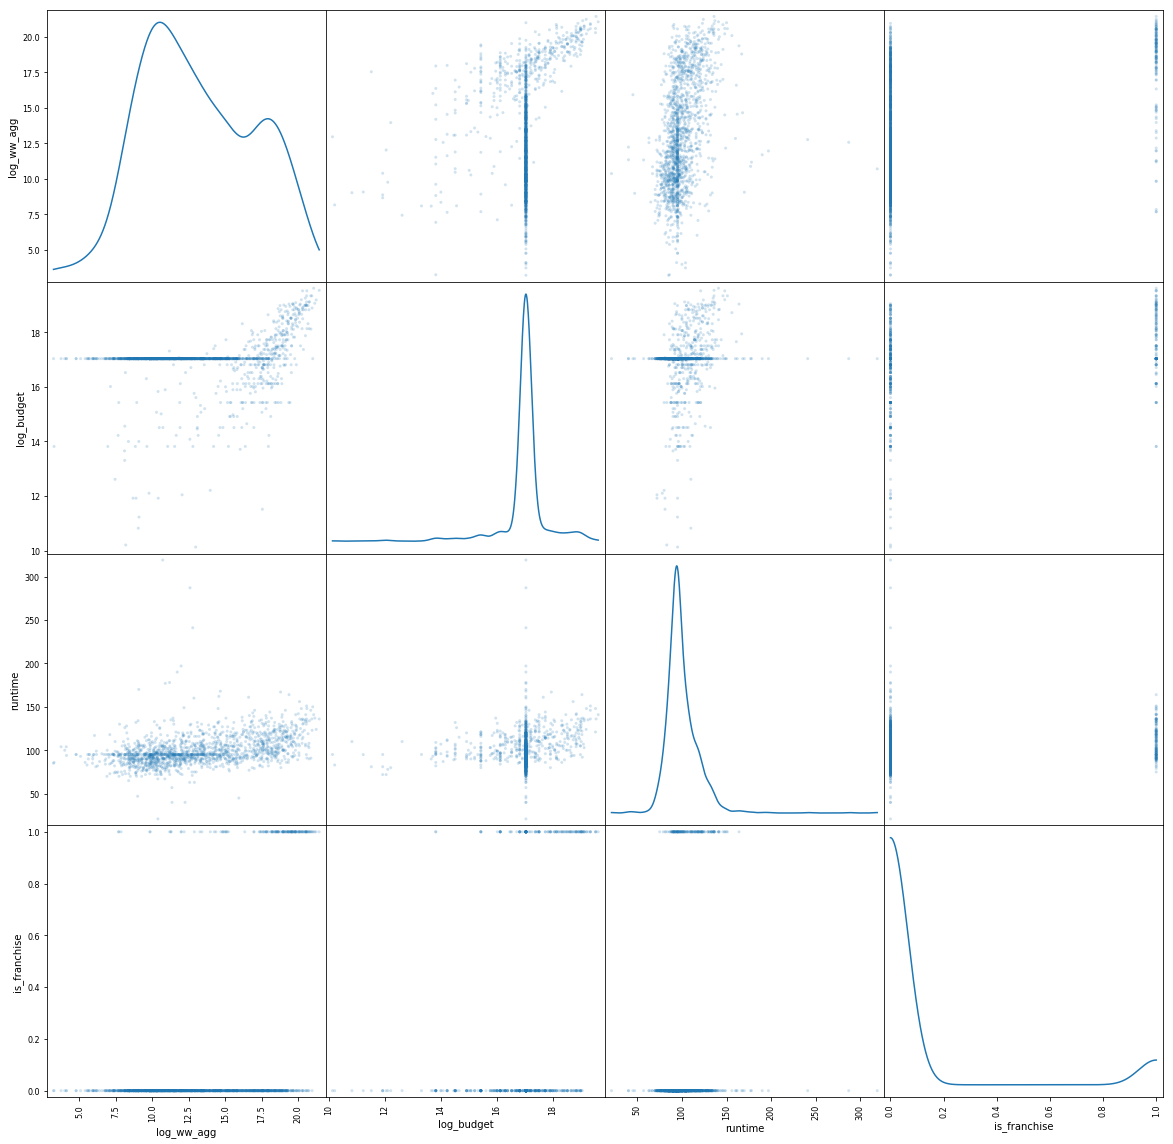

In [26]:
scatter_matrix(df_for_scatter, alpha=0.2, figsize=(20, 20), diagonal='kde')